In [14]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [1]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [2]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
len(X_test)

10000

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

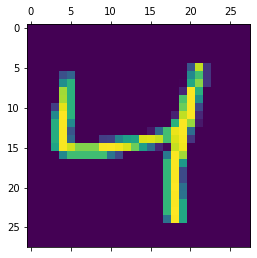

In [10]:
# See Train data at 3rd position
plt.matshow(X_train[2])

In [11]:
# See target data at 3rd position
y_train[2]

4

In [12]:
# See target data at first 5th position
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [3]:
# Scalling (at first do without scalling)
X_train=X_train/255
X_test=X_test/255

In [4]:
# Reshape data
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [15]:
# See  the reshaped data 
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()
model.add(Dense(10,input_shape=(784,),activation='sigmoid'))
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)	

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4748 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9256


In [10]:
# Evaluate the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9257


[0.2675669491291046, 0.9257000088691711]

In [11]:
# Model prediction
model.predict(X_test_flattened)

array([[2.21579373e-02, 2.79625624e-07, 6.65131211e-02, ...,
        9.99797523e-01, 9.23444033e-02, 6.51999474e-01],
       [3.16960990e-01, 4.86725569e-03, 9.99344409e-01, ...,
        1.15845441e-12, 1.51908845e-01, 3.52728935e-09],
       [3.50892544e-04, 9.93106723e-01, 6.66297197e-01, ...,
        1.34643108e-01, 4.19959694e-01, 4.86469269e-02],
       ...,
       [2.47873891e-06, 3.66433437e-06, 1.23038888e-03, ...,
        1.53568685e-01, 5.47403514e-01, 7.50837505e-01],
       [1.17423486e-04, 1.74969435e-04, 1.16829578e-04, ...,
        5.52115998e-05, 7.18617320e-01, 1.46359205e-04],
       [8.92868638e-03, 2.91883018e-10, 1.42064184e-01, ...,
        1.89526066e-08, 2.50011683e-04, 4.61552162e-07]], dtype=float32)

In [12]:
# See the predicted test data
y_predicted=model.predict(X_test_flattened)
# See the score for predicted value
y_predicted[0] 

array([2.2157937e-02, 2.7962562e-07, 6.6513121e-02, 9.6182394e-01,
       2.1128654e-03, 1.1976421e-01, 1.4144579e-06, 9.9979752e-01,
       9.2344403e-02, 6.5199947e-01], dtype=float32)

In [16]:
# See predicted value 
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
# Confusion Matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    3,    2,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   3,    8,  924,   20,    9,    5,   12,    9,   39,    3],
       [   1,    0,   14,  932,    0,   21,    2,   11,   22,    7],
       [   1,    1,    2,    1,  918,    0,   12,    3,   10,   34],
       [   7,    2,    3,   40,    9,  777,   11,    7,   29,    7],
       [  10,    3,   10,    1,    8,   16,  905,    2,    3,    0],
       [   1,    5,   22,   10,    9,    0,    0,  944,    3,   34],
       [   5,    7,    5,   27,    9,   27,    8,    9,  870,    7],
       [  10,    7,    1,   10,   28,    8,    0,   20,    8,  917]],
      dtype=int32)>

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
y_predict=y_predicted_labels[:len(y_test)]
print('Classification Report:\n',classification_report(y_test,y_predict))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))
print('Accuracy Score:',accuracy_score(y_test,y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.89      0.92      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

Confusion Matrix:
 [[ 959    0    2    2    0    6    6    3    2    0]
 [   0 1111    3    2    0    2    4    2   11    0]
 [   3    8  924   20    9    5   12    9   39    3]
 [   1    0   14  932    0   21    2   

#Now add hidden layer

In [19]:
# Now add hidden layer
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it. 
model=Sequential([Dense(100,input_shape=(784,),activation='relu'),Dense(10,activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
              )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2735 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1230 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0519 - accuracy: 0.9843


## add drop out

In [21]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
# Now add hidden layer
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it. 
model=Sequential([Dense(100,input_shape=(784,),activation='relu'),Dense(10,activation='sigmoid'),Dropout(0.2)])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
              )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0823 - accuracy: 0.7275
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7180 - accuracy: 0.7593
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6383 - accuracy: 0.7697
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6078 - accuracy: 0.7733
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5838 - accuracy: 0.7762


In [23]:
# Summarize the built model

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


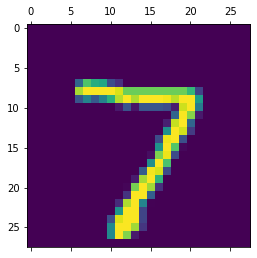

In [34]:
# See the actual test data
plt.matshow(X_test[0])

In [35]:
# See the predicted test data
y_predicted=model.predict(X_test_flattened)
# See the score for predicted value
y_predicted[0] 

array([0.14637546, 0.10064066, 0.09895716, 0.08473294, 0.08320031,
       0.05246705, 0.09944676, 0.13333204, 0.10234377, 0.09850381],
      dtype=float32)

In [36]:
# See the predicted value
np.argmax(y_predicted[0])

0

In [26]:
# See predicted value 
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
# See actual value 
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [27]:
# Confusion Matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    3,    2,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   3,    8,  924,   20,    9,    5,   12,    9,   39,    3],
       [   1,    0,   14,  932,    0,   21,    2,   11,   22,    7],
       [   1,    1,    2,    1,  918,    0,   12,    3,   10,   34],
       [   7,    2,    3,   40,    9,  777,   11,    7,   29,    7],
       [  10,    3,   10,    1,    8,   16,  905,    2,    3,    0],
       [   1,    5,   22,   10,    9,    0,    0,  944,    3,   34],
       [   5,    7,    5,   27,    9,   27,    8,    9,  870,    7],
       [  10,    7,    1,   10,   28,    8,    0,   20,    8,  917]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

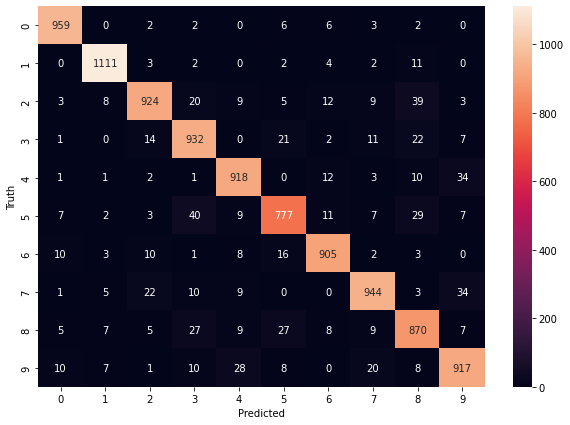

In [28]:
# See the heat plot
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
y_predict=y_predicted_labels[:len(y_test)]
print('Classification Report:\n',classification_report(y_test,y_predict))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))
print('Accuracy Score:',accuracy_score(y_test,y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.89      0.92      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

Confusion Matrix:
 [[ 959    0    2    2    0    6    6    3    2    0]
 [   0 1111    3    2    0    2    4    2   11    0]
 [   3    8  924   20    9    5   12    9   39    3]
 [   1    0   14  932    0   21    2   

In [54]:
# Alternatively use the Flatten function
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(100,input_shape=(784,),activation='relu'))
Dense(10,input_shape=(784,),activation='sigmoid')

In [55]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
              )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 4.5696 - accuracy: 0.1139
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 4.6051 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 4.6051 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 4.6051 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 4.6051 - accuracy: 0.0987
